In [1]:
import sys 
import re, numpy as np, pandas as pd 
from pprint import pprint 

import gensim
import spacy
#from spacy.lang.en.examples import sentences 
#nlp = spacy.load("en_core_web_sm")
import gensim.corpora as corpora 
from gensim.utils import lemmatize, simple_preprocess 
from gensim.models import CoherenceModel 
import matplotlib.pyplot as plt 

import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)


{'myself', "isn't", 'again', "that'll", 'these', 'can', 'some', "wouldn't", 'm', 'was', "weren't", 'so', 'over', "didn't", 'your', 'does', 'not', 've', 'but', 'off', 'will', "you'll", 'we', 'weren', 're', 'her', 'll', "shouldn't", 'through', 'out', 'above', 'here', "mustn't", 'shouldn', 'been', "aren't", 'until', 'into', 'be', 'from', 'an', 'no', 'they', 'aren', "doesn't", 'a', 'then', 'doing', 'the', 'when', 'me', 'he', "hasn't", 'which', 'own', 'am', 'you', "wasn't", 'during', "she's", 'under', 'ain', 'mustn', 'yourself', 'yourselves', 'hers', 'being', 'mightn', 'both', 'herself', 'now', 'few', 'below', 'isn', 'wasn', 'do', 'those', 'or', 'our', 'yours', 'doesn', "won't", 'such', 'needn', 'down', 'd', "should've", "you'd", 'didn', 'won', 'itself', 'couldn', 'what', 'this', 'before', "couldn't", 'having', 'most', 'did', 'himself', 'themselves', 'further', 'between', 'all', 'and', 'ours', "needn't", 'only', 'to', 'against', 'haven', "hadn't", "you've", 'hadn', 'ourselves', 'his', 'in',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guddu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
realdata_df= pd.read_csv('realdata.csv')
fakedata_df=pd.read_csv('fakedata.csv')

In [3]:
def sent_to_words(sentences):
    for sent in sentences: 
        sent = re.sub('\S*@\S*\s?','',sent)
        sent = re.sub('\s+','',sent)
        sent = re.sub("\''",'',sent)
        sent = gensim.utils.simple_preprocess(str(sent),deacc=True)
        yield(sent)
        
real_data=realdata_df.Article.values.tolist()
real_data_words=list(sent_to_words(real_data))
print(real_data_words)

[['viacnnopinion'], [], ['here', 'wolf'], [], ['senselessacts'], ['smassacre'], ['wasthatcovid', 'saysdr', 'ameshadalja'], ['the', 'year', 'countsoffirst', 'degreemurder'], [], ['travel'], ['smarketrally', 'thedowands', 'simpressivega', 'seemore'], [], ['whilethere'], ['texas', 'theyshould', 'we', 'againandagain', 'catherinee', 'shoichetwrites'], [], ['writescnn'], [], ['colorado', 'onmonday', 'andit', 'heroic', 'byofficials'], [], ['atleast', 'people', 'colorado'], [], ['formany'], ['april', 'that', 'et', 'pt'], ['to'], ['mexicoborder'], ['theco'], ['butmanyasian'], [], [], [], ['justin'], ['thisiscnn'], ['writescnn'], ['astrazenecasaid'], [], ['andthoughthe'], [], ['ratherthanmorf', 'butithasn', 'thappenedyet'], ['newyorkrep'], ['thisiscnn'], [], [], ['idon', 'ryanlowrywrote', 'igetit', 'you'], ['and'], ['insicily', 'andyou', 'stanleytucci', 'tonightat', 'et', 'pt'], ['basedviolence', 'georgiastaterep', 'areashootings'], ['don', 'tcome'], ['lukeletlow'], ['thisiscnn'], [], ['atlanta'

In [4]:
fake_data=fakedata_df.Article.values.tolist()
fake_data_words=list(sent_to_words(fake_data))
print(fake_data_words)

[['andolder'], ['in', 'colorado'], ['it'], [], [], ['rep', 'madisoncawthorn'], ['sandyphillips'], ['iceland', 'https', 'cnn', 'it', 'qpckne'], [], ['rikkiolds', 'unclesaid'], [], ['butincreasingly', 'from'], ['thecenter'], ['california'], ['sitemofsorts', 'thefinalbidwas', 'million'], ['addingthatit', 'sbelieved'], ['ididn', 'tseeashooter'], ['apparently', 'coronavirus', 'relatedproducts'], ['onlyabout'], [], [], [], [], ['inmanycases'], [], ['thenear', 'accordingtonasa'], [], ['killsheltercity'], [], ['baylor', 'star', 'times', 'was'], [], ['tomarch'], ['comanditsapps'], [], ['fromayearago'], [], ['record'], [], [], [], [], ['amarawalker', 'afraid', 'fearinamerica', 'tonightat', 'et'], ['morethan', 'days'], ['scovid', 'adropinlong'], ['reportsofanti', 'eastandanti'], ['brooklyn'], [], ['dr', 'anthonyfauci', 'sbook'], ['thethree', 'bedroom', 'two'], [], ['sacrificialpits'], [], ['morethan'], [], ['frankly', 'trumpsaid'], [], ['it', 'butcasumarzu', 'amaggot'], [], ['writescnn'], ['maybe

In [5]:
bigram = gensim.models.Phrases(real_data_words, min_count=5, threshold=1044)
trigram = gensim.models.Phrases(bigram[real_data_words],threshold=1044)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [6]:
def process_words(text, stopwords=stopwords, allowed_postags=['NOUN','ADJ','VERB','ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    text = [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in text]
    text = [bigram_mod[doc] for doc in text]
    text = [trigram_mod[bigram_mod[doc]] for doc in text]
    text_out = []
    nlp = spacy.load('en_core_web_sm',disable = ['parser','ner'])
    for sent in text:
        doc = nlp(" ".join(sent))
        text_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        text_out = [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in text_out]
    return text_out
    
    

In [7]:
real_data_ready = process_words(real_data_words)


In [8]:
id2word = corpora.Dictionary(real_data_ready)
corpus = [id2word.doc2bow(text) for text in real_data_ready]


In [9]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=10,random_state=1044,update_every=1,chunksize=10,passes=10,alpha='symmetric',iterations=1044,per_word_topics=True)

In [10]:
pprint(lda_model.print_topics())

[(0,
  '0.274*"saidsen" + 0.137*"toooftenwoman" + 0.137*"timkaine" + '
  '0.010*"murkowski" + 0.010*"mcconnellsay" + 0.009*"face" + 0.009*"statesen" '
  '+ 0.006*"texas" + 0.003*"sleft" + 0.003*"innameonly"'),
 (1,
  '0.222*"tenpeople" + 0.043*"year" + 0.026*"trumpsayshe" + 0.026*"expect" + '
  '0.026*"bidenfall" + 0.009*"colo" + 0.005*"old" + 0.004*"wellinside" + '
  '0.003*"openedfire" + 0.003*"anax"'),
 (2,
  '0.145*"gov" + 0.096*"sen" + 0.026*"tcome" + 0.024*"biden" + 0.024*"graham" '
  '+ 0.018*"randpaul" + 0.008*"america" + 0.008*"snewsroom" + 0.007*"thestory" '
  '+ 0.006*"school"'),
 (3,
  '0.207*"colorado" + 0.184*"onmonday" + 0.064*"break" + 0.005*"slander" + '
  '0.005*"candaceowen" + 0.003*"heroic" + 0.002*"thisweek" + '
  '0.002*"deadinboulder" + 0.002*"thebostonbomber" + 0.002*"atleast"'),
 (4,
  '0.165*"ssport" + 0.165*"sayit" + 0.165*"butopponent" + '
  '0.165*"defendingwoman" + 0.013*"nottoday" + 0.004*"sinfamousmarch" + '
  '0.004*"petrified" + 0.004*"orderthatcovid" 

In [12]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=real_data_ready):
    sent_topics_df = pd.DataFrame()
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list 
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
    for j, (topic_num, prop_topic) in enumerate(row):
        if j == 0:
            wp = ldamodel.show_topic(topic_num)
            topic_keywords = ",".join([word for word, prop in wp])
            sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4),topic_keywords]), ignore_index=True)
        else: 
            break 
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents],axis=1)
    return(sent_topics_df)
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=real_data_ready)
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No','Dominant_Topic','Topic_Perc_Contrib','Keywords','Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.1003,"let,sdoit,sgoooo,ohhhyes,sright,sgogeorgia,mex...",[viacnnopinion]
1,1,NaN,NaN,NaN,[]
2,2,NaN,NaN,NaN,[wolf]
3,3,NaN,NaN,NaN,[]
4,4,NaN,NaN,NaN,[senselessact]
5,5,NaN,NaN,NaN,[smassacre]
6,6,NaN,NaN,NaN,"[wasthatcovid, saysdr, ameshadalja]"
7,7,NaN,NaN,NaN,"[year, countsoffirst, degreemurder]"
8,8,NaN,NaN,NaN,[]
9,9,NaN,NaN,NaN,[travel]


In [13]:
pd.options.display.max_colwidth = 100
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],axis=0)
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
sent_topics_sorteddf_mallet.columns = ['Topic_Num','Topic_Perc_Contrib','Keywords','Representative_Text']
sent_topics_sorteddf_mallet.head(10)
    

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative_Text
0,8.0,0.1003,"let,sdoit,sgoooo,ohhhyes,sright,sgogeorgia,mexicoborder,idon,onsunday,mph",[viacnnopinion]


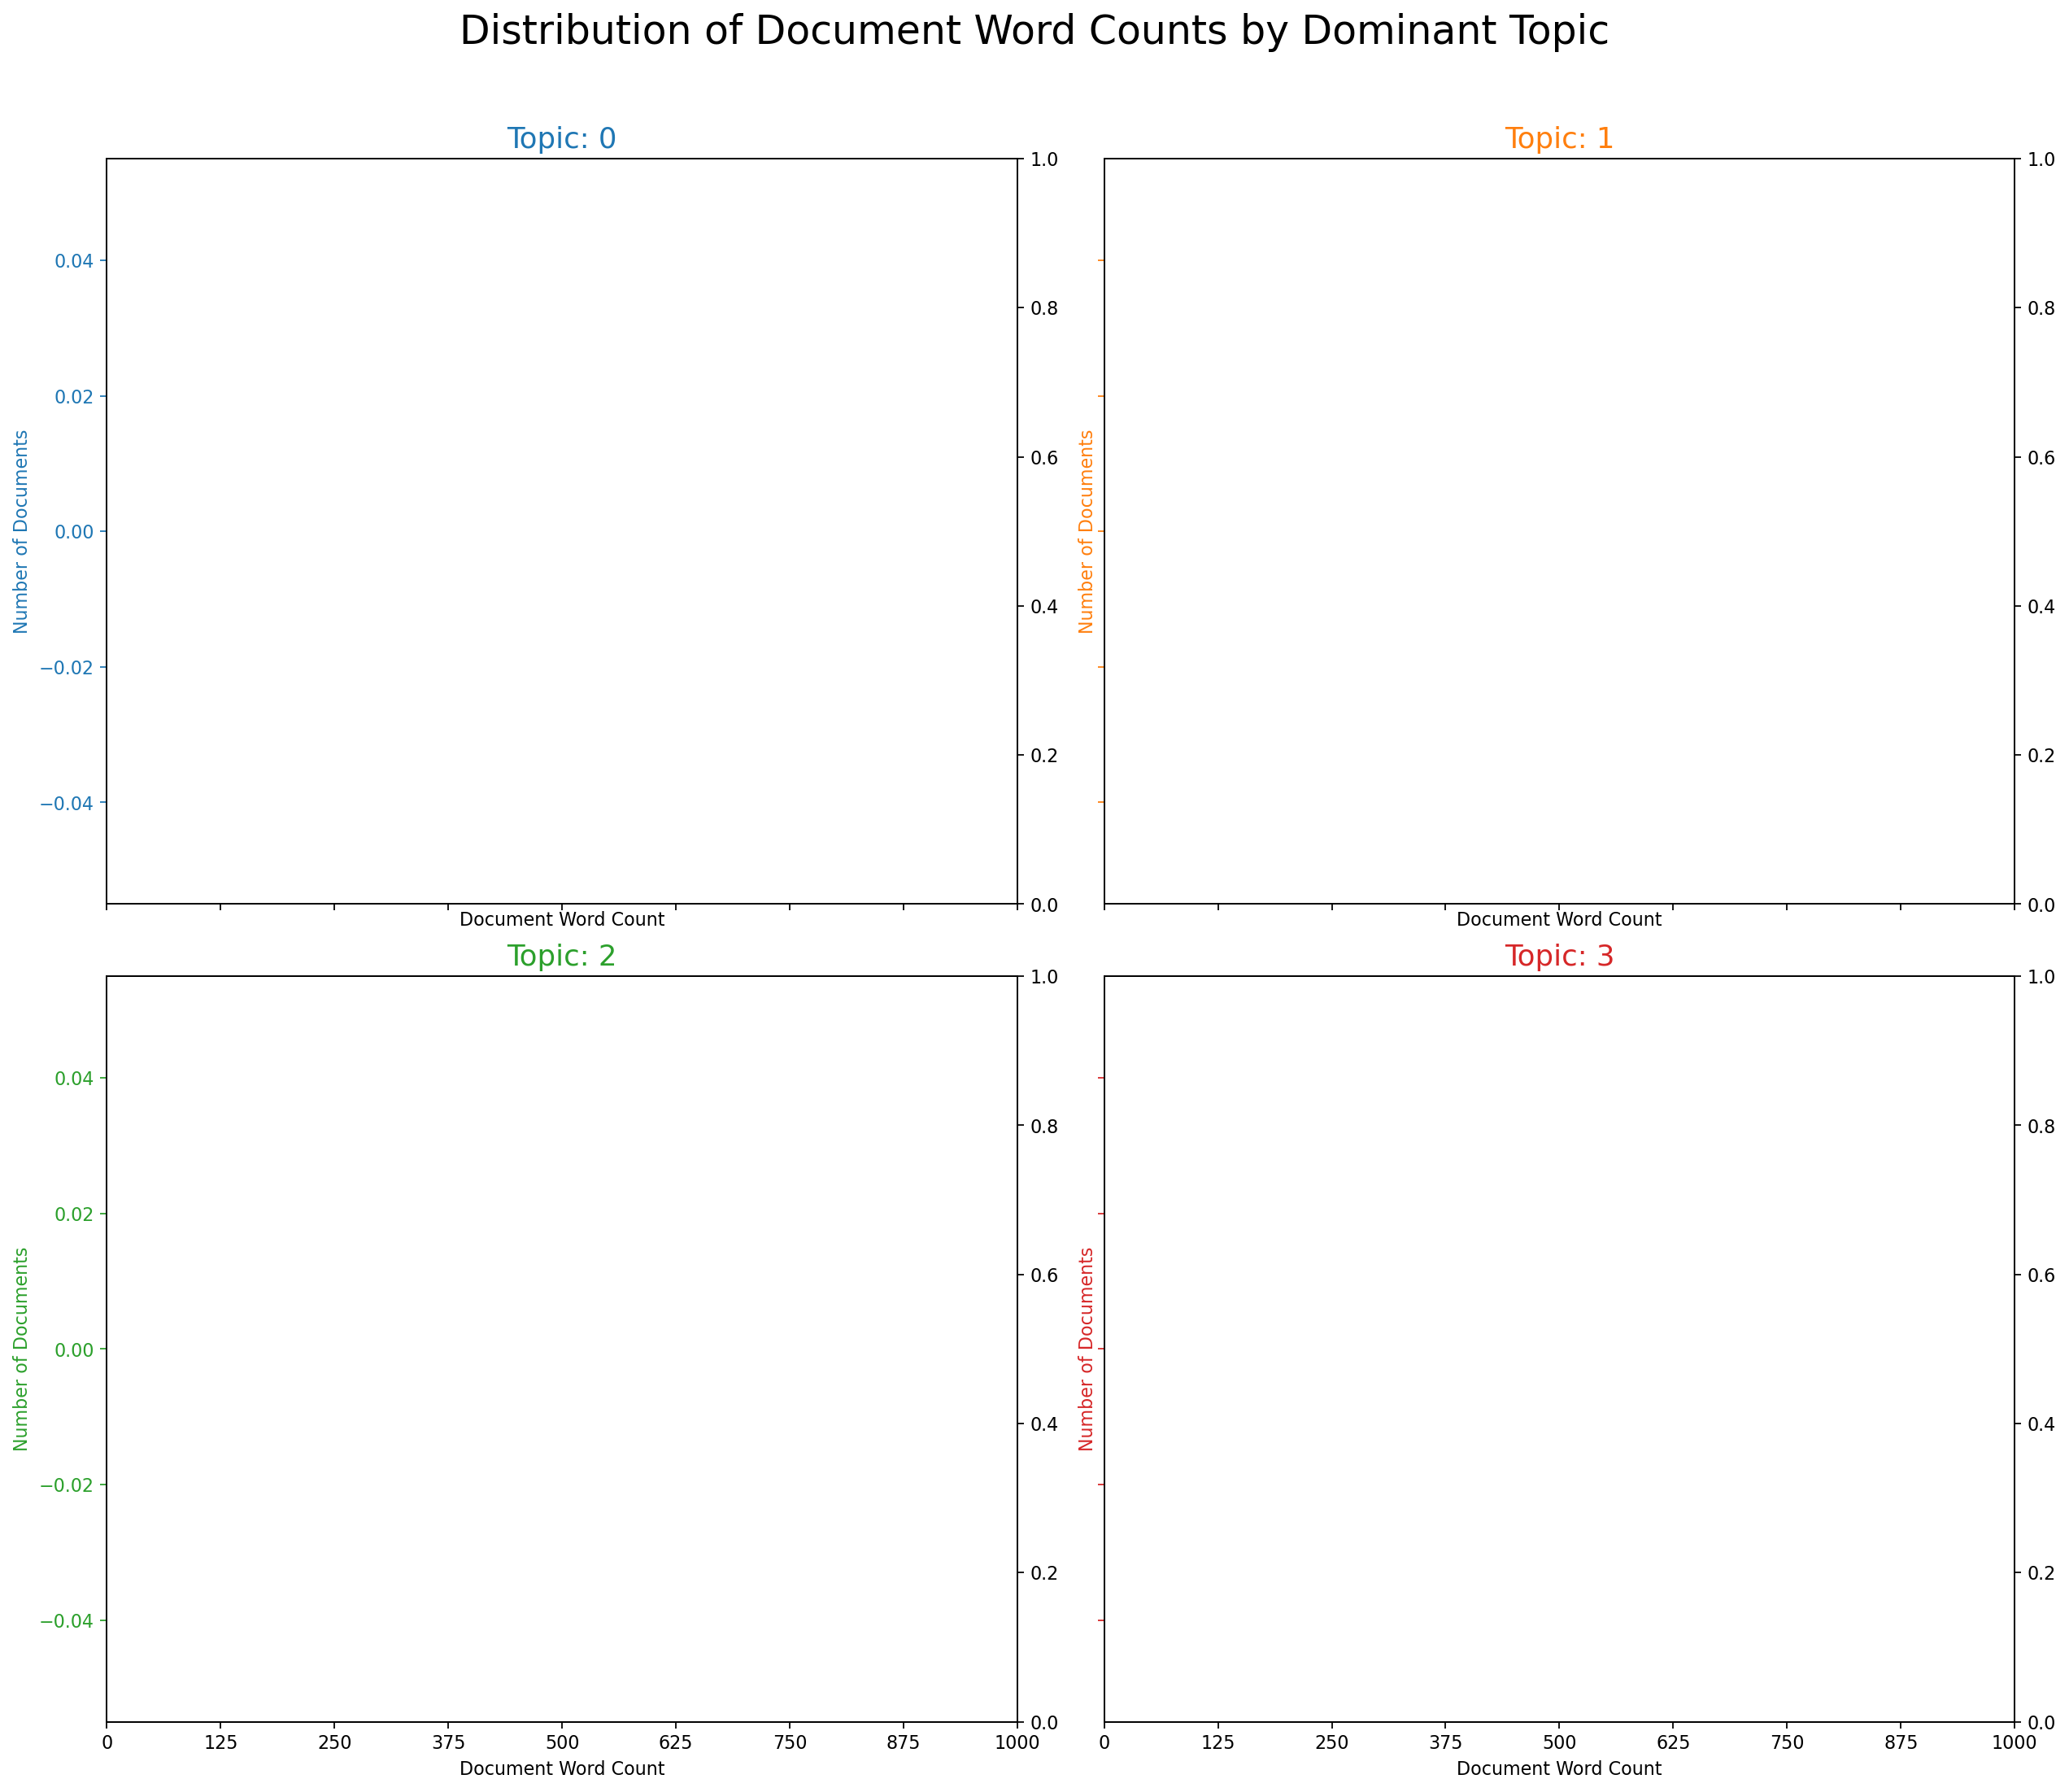

In [14]:
import seaborn as sns
import matplotlib.colors as mcolors 
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
fig, axes = plt.subplots(2,2,figsize=(16,14),dpi=160,sharex=True,sharey=True)
for i, ax in enumerate(axes.flatten()):
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color = cols[i])
    ax.tick_params(axis ='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color ='black', shade=False, ax=ax.twinx())
    ax.set(xlim=(0,1000), xlabel = 'Document Word Count')
    ax.set_ylabel('Number of Documents', color = cols[i])
    ax.set_title('Topic: '+str(i), fontdict= dict(size=16, color=cols[i]))
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

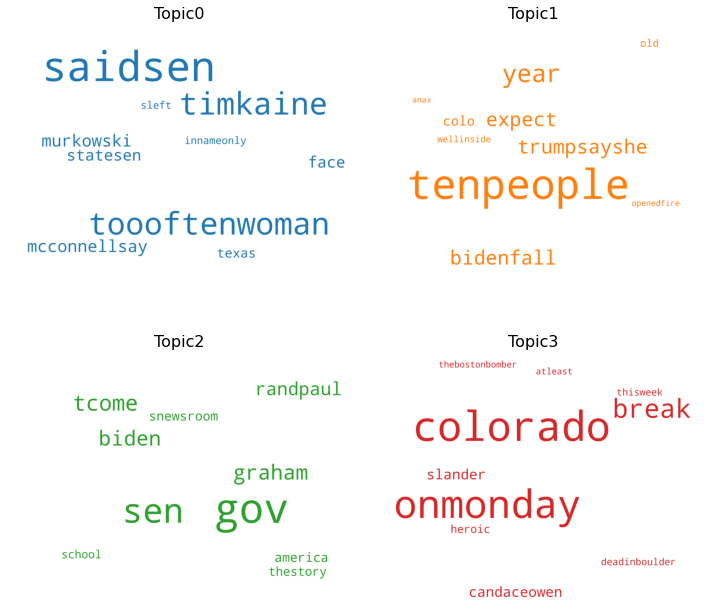

In [15]:
from matplotlib import pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.colors as mcolors 

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stopwords,
                  background_color='white', width=2500,
                  height=1800,
                  max_words=40,
                  colormap='tab10',
                  color_func=lambda*args,  **kwargs: cols[i],
                  prefer_horizontal=1.0)
topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words,max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic' +str(i), fontdict = dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace = 0, hspace = 0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [16]:
topic_words

{'colorado': 0.20727709,
 'onmonday': 0.18420619,
 'break': 0.06364579,
 'slander': 0.0052381046,
 'candaceowen': 0.0052381046,
 'heroic': 0.0028861705,
 'thisweek': 0.0021343855,
 'deadinboulder': 0.0021343855,
 'thebostonbomber': 0.0017827103,
 'atleast': 0.0017721833}